## Imports

In [1]:
# to było mi potrzebne, aby zadziałała funkcja pobierająca fmnista

# import ssl

# ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from random import shuffle
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# necessary to update script changes without restarting the entire kernel
from centroids import compute_centroids

import importlib, sys
importlib.reload(sys.modules['centroids'])
from centroids import compute_centroids, measure_distances, visualize_tsne_with_clusters   

## Dataset

In [4]:
from keras.datasets import fashion_mnist

# Loading dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# agglomerative clustering algorithm doesnt work with whole dataset
train_images, _, train_labels, _ = train_test_split(train_images, train_labels, train_size=0.7, random_state=42)
test_images, _, test_labels, _ = train_test_split(test_images, test_labels, train_size=0.7, random_state=42)

indices = np.arange(train_images.shape[0])
shuffle(indices)
train_images = train_images[indices]
train_labels = train_labels[indices]

In [5]:
print(train_images.shape)
print(test_images.shape)
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)
print(X_train.shape)
print(X_test.shape)

(42000, 28, 28)
(7000, 28, 28)
(42000, 784)
(7000, 784)


In [6]:
y_train, y_test= train_labels, test_labels

In [7]:
print(y_train.shape)
print(y_test.shape)

(42000,)
(7000,)


In [8]:
print(set(y_train))
print(set(y_test))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## Kmeans global centroids

In [9]:
centroids_kmeans_global, kmeans_global_labels=compute_centroids("kmeans", "global", X_train, y_train, 0, 100)

In [10]:
print(centroids_kmeans_global)

[[-7.58941521e-19  6.07153217e-18 -1.38777878e-17 ...  3.19737991e+01
   1.76550218e+01  2.30567686e+00]
 [-1.62630326e-18 -6.93889390e-18  8.32667268e-17 ...  4.41176471e-02
   1.83823529e-03 -5.55111512e-17]
 [-1.30104261e-18  6.93889390e-18 -3.46944695e-18 ...  1.36789298e+00
   8.36120401e-02  6.93889390e-17]
 ...
 [-1.51788304e-18 -3.46944695e-18  7.63278329e-17 ...  1.73913043e-01
   7.50988142e-02 -1.38777878e-17]
 [-1.19262239e-18  6.93889390e-18  3.46944695e-18 ...  1.77635684e-15
   1.55431223e-15  6.93889390e-17]
 [-1.19262239e-18  6.07153217e-18 -1.38777878e-17 ...  8.88178420e-16
   1.44328993e-15  5.55111512e-17]]


In [11]:
print(type(centroids_kmeans_global))
print(centroids_kmeans_global.shape)

<class 'numpy.ndarray'>
(100, 784)


## Kmeans local centroids

In [12]:
centroids_kmeans_local, kmeans_local_labels=compute_centroids("kmeans", "local", X_train, y_train, 10, 0)

In [13]:
print(centroids_kmeans_local)

[[ 2.71050543e-20 -1.90819582e-17  1.38790036e-01 ...  1.42348754e-02
   4.16333634e-17  1.73472348e-18]
 [-3.52365706e-19  5.60747664e-03  5.98130841e-02 ...  4.48598131e-02
   2.61682243e-02  3.46944695e-17]
 [ 5.42101086e-20  6.25000000e-02  2.50000000e-01 ...  1.91517857e+00
   6.20535714e-01  1.74107143e-01]
 ...
 [ 0.00000000e+00 -4.33680869e-18 -4.33680869e-18 ... -1.15463195e-14
  -4.88498131e-15  2.22044605e-16]
 [ 0.00000000e+00 -3.46944695e-18 -3.46944695e-18 ...  3.97534247e+00
   1.99452055e+00  2.27397260e-01]
 [ 0.00000000e+00 -8.67361738e-19 -8.67361738e-19 ... -1.33226763e-14
  -6.21724894e-15  2.77555756e-16]]


## Agglomerative clustering global centroids

In [14]:
# wymaga poprawy (lub algorytm jest po prostu bardzo kosztowny, bo na calym zbiorze nie liczy sie nawet dla jednej centroidy)
centroids_agglomerative_global, agglomerative_global_labels=compute_centroids("agglomerative", "global", X_train, y_train, 0, 100)

In [15]:
print(centroids_agglomerative_global)

[[2.79329609e-03 2.51396648e-02 9.21787709e-02 ... 5.54469274e+00
  1.95251397e+00 2.84916201e-01]
 [0.00000000e+00 0.00000000e+00 9.76331361e-02 ... 1.24852071e+00
  4.14201183e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 1.45985401e-02 1.45985401e-02 ... 6.70802920e+00
  2.04379562e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.14117647e+00
  3.13725490e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.87179487e+01
  9.74358974e+00 9.23076923e-01]]


In [16]:
print(centroids_agglomerative_global.shape)

(100, 784)


## Agglomerative clustering local centroids

In [17]:
centroids_agglomerative_local, agglomerative_local_labels=compute_centroids("agglomerative", "local", X_train, y_train, 10, 0)

In [18]:
print(centroids_agglomerative_local)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.99145299e-02
  2.99145299e-02 2.99145299e-02]
 [1.36612022e-03 3.68852459e-02 2.81420765e-01 ... 1.07923497e-01
  2.32240437e-02 9.56284153e-03]
 [0.00000000e+00 1.12359551e-02 1.92415730e-01 ... 6.88202247e-02
  1.40449438e-02 0.00000000e+00]
 ...
 [0.00000000e+00 6.75675676e-03 6.75675676e-03 ... 1.27331081e+01
  6.41554054e+00 3.37837838e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.19333333e+01
  4.52500000e+00 4.25000000e-01]]


In [19]:
print(centroids_agglomerative_local.shape)

(100, 784)


## DBSCAN global centroids

In [20]:
# trzeba poszukac odpowiednich parametrow
centroids_dbscan_global, dbscan_global_labels=compute_centroids("dbscan", "global", X_train, y_train, 0, 1, epsilon=1100, min_samples=40)

In [21]:
print(centroids_dbscan_global)

[[5.51528522e-04 1.33942641e-03 1.48518752e-02 3.46281122e-02
  6.51985503e-02 1.06287425e-01 2.58233533e-01 1.06641979e+00
  4.02674913e+00 1.44232587e+01 4.07097778e+01 5.93940277e+01
  6.75548377e+01 6.29636385e+01 6.05729987e+01 6.63664513e+01
  6.41365821e+01 4.96024661e+01 2.98320202e+01 8.57591396e+00
  1.88075165e+00 4.43231957e-01 1.47336905e-01 8.21777498e-02
  2.37157264e-02 7.20926568e-03 1.85156004e-03 4.72738733e-04
  5.51528522e-04 1.22124173e-03 1.26851560e-02 7.03986763e-02
  1.33391113e-01 7.79940120e-01 4.82670186e+00 1.39949181e+01
  2.93898913e+01 5.59730145e+01 9.41397337e+01 1.20996336e+02
  1.36343011e+02 1.34070359e+02 1.31761228e+02 1.36705287e+02
  1.30018476e+02 1.03979278e+02 7.86976836e+01 4.22113930e+01
  1.96543492e+01 7.66419792e+00 1.74180586e+00 2.82343208e-01
  6.03135834e-02 2.32429877e-02 1.07154113e-02 5.12133627e-04
  7.09108100e-04 1.22124173e-03 1.32760794e-02 8.90718563e-02
  7.27347936e-01 6.82997164e+00 2.05778837e+01 3.22056413e+01
  4.9375

In [22]:
print(centroids_dbscan_global.shape)

(1, 784)


## DBSCAN local centroids

In [23]:
# trzeba poszukac odpowiednich parametrow
centroids_dbscan_local, dbscan_local_labels=compute_centroids("dbscan", "local", X_train, y_train, epsilon=1100, min_samples=40)

In [24]:
print(centroids_dbscan_local)
print(centroids_dbscan_local.shape)

[[0.00000000e+00 4.95049505e-03 1.15275813e-01 ... 7.99151344e-02
  8.48656294e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.19111484e-04 2.09555742e-03 ... 1.58130763e+00
  3.73009220e-02 0.00000000e+00]
 ...
 [6.48448356e-03 7.87401575e-03 9.26354794e-03 ... 5.79898101e-01
  5.37285780e-02 1.29689671e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(9, 784)


In [25]:
print(centroids_dbscan_local.shape)

(9, 784)


## Distances

In [26]:
distances_kmeans_global = measure_distances(X_train, centroids_kmeans_global)
distances_kmeans_local = measure_distances(X_train, centroids_kmeans_local)
distances_agglomerative_global = measure_distances(X_train, centroids_agglomerative_global)
distances_agglomerative_local = measure_distances(X_train, centroids_agglomerative_local)
distances_dbscan_global = measure_distances(X_train, centroids_dbscan_global)
distances_dbscan_local = measure_distances(X_train, centroids_dbscan_local)

In [27]:
print(distances_kmeans_global)
print(distances_kmeans_local)
print(distances_agglomerative_global)
print(distances_agglomerative_local)
print(distances_dbscan_global)
print(distances_dbscan_local,)

[[2746.76726086 2812.88259048 2792.58083261 ... 2915.92786234
  2933.05583576 3041.15286719]
 [3531.22957806 1813.8346468  3608.91975995 ... 3695.18596583
  3057.84023536 3009.63193572]
 [3143.89492825 1744.22752923 2405.44854097 ... 2602.14273706
  1420.20017696 1777.9467259 ]
 ...
 [3108.54618377 4085.66205857 2167.7283081  ... 2727.98559256
  3348.23471131 3548.08738793]
 [2650.5490403  2179.92715766 2393.34601094 ... 2810.64724973
  2648.70282152 2783.0714511 ]
 [3252.65173865 3533.94931202 2248.0026819  ... 1663.09333492
  2981.92790848 3219.69548836]]
[[2912.77811789 2770.29909166 2249.97513826 ... 2645.93691045
  1487.04620012 2336.68545894]
 [3726.70429344 1691.79718279 2425.91912213 ... 1922.43082651
  3098.18891616 2635.9223277 ]
 [1350.02618703 1644.5858426  1255.78083192 ... 2884.20834358
  2801.3227289  2980.10233741]
 ...
 [2818.23791601 4000.06840377 2934.58133384 ... 4021.33813043
  3419.89086803 3818.19296885]
 [2748.16360638 2064.70400613 1638.07641914 ... 2655.334458

## Visualization

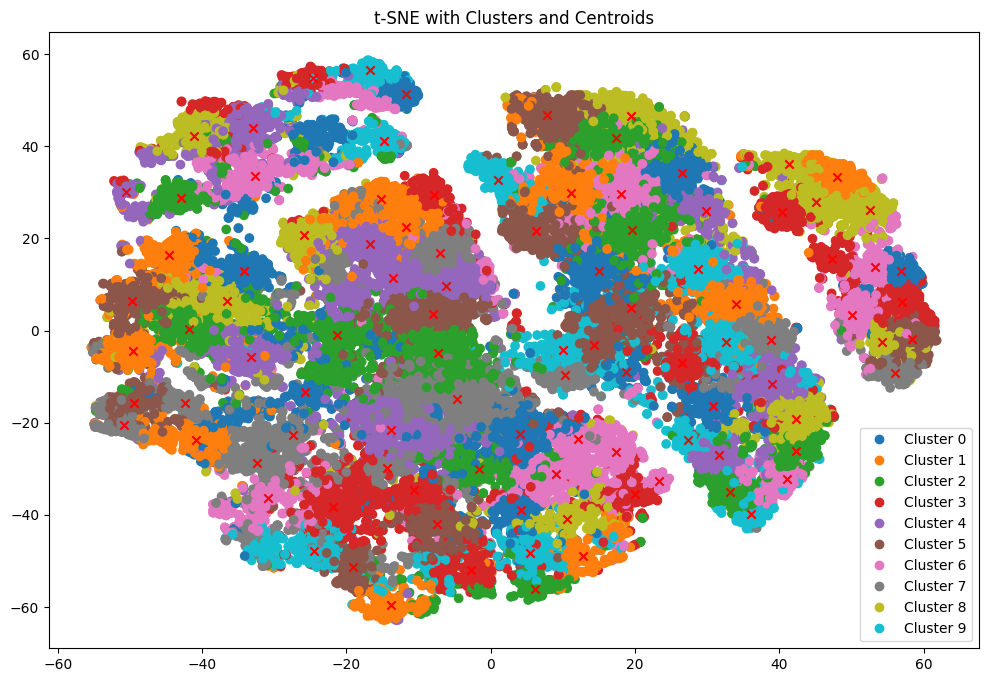

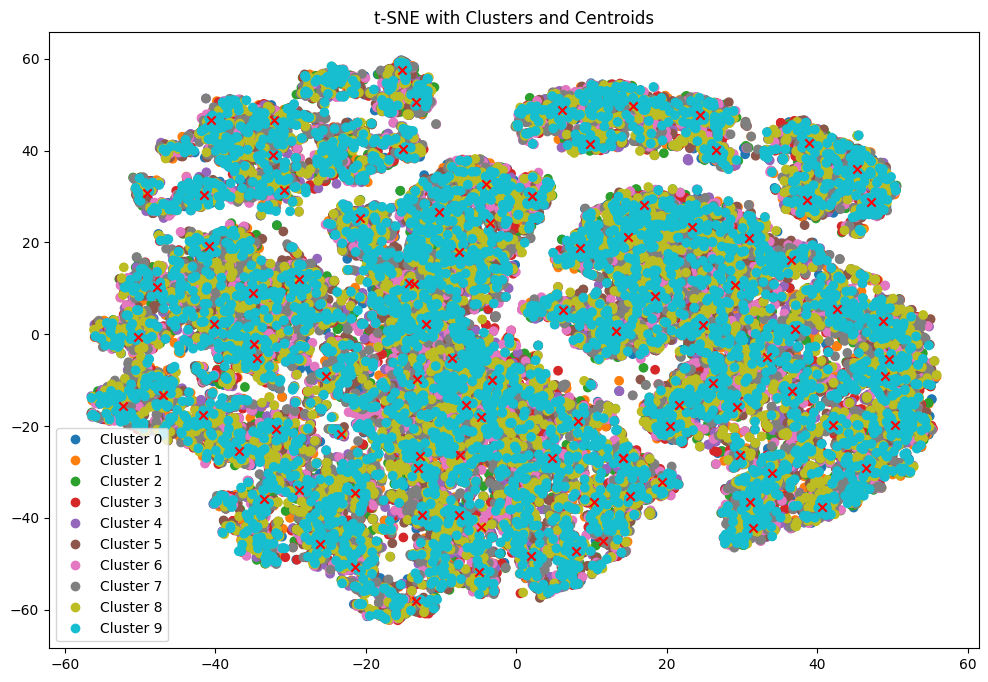

In [28]:
visualize_tsne_with_clusters(X_train, kmeans_global_labels, centroids_kmeans_global)
visualize_tsne_with_clusters(X_train, kmeans_local_labels, centroids_kmeans_local)

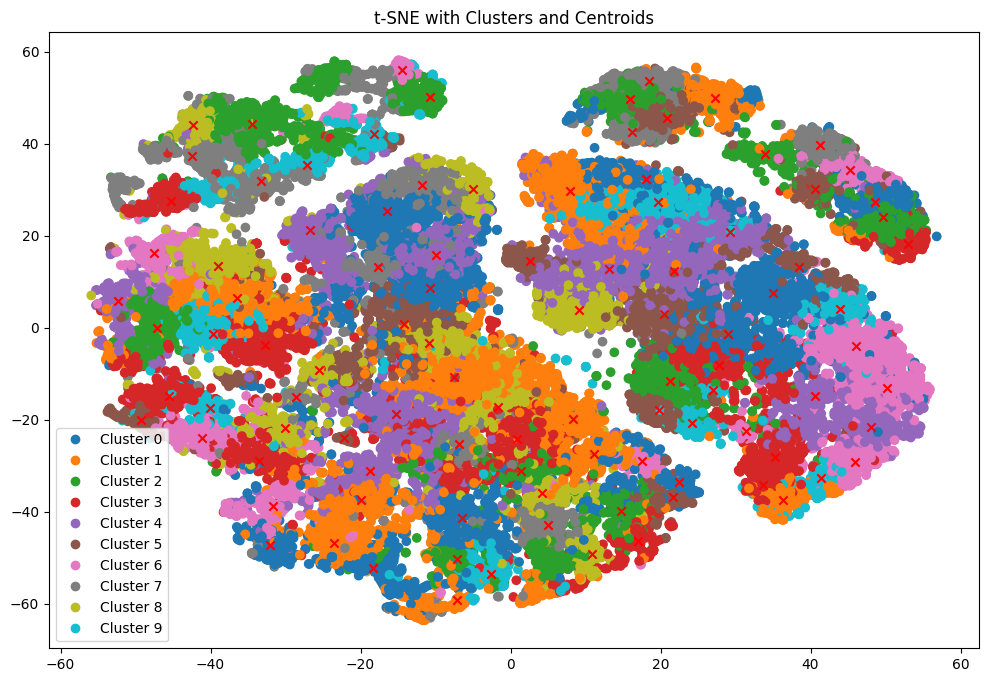

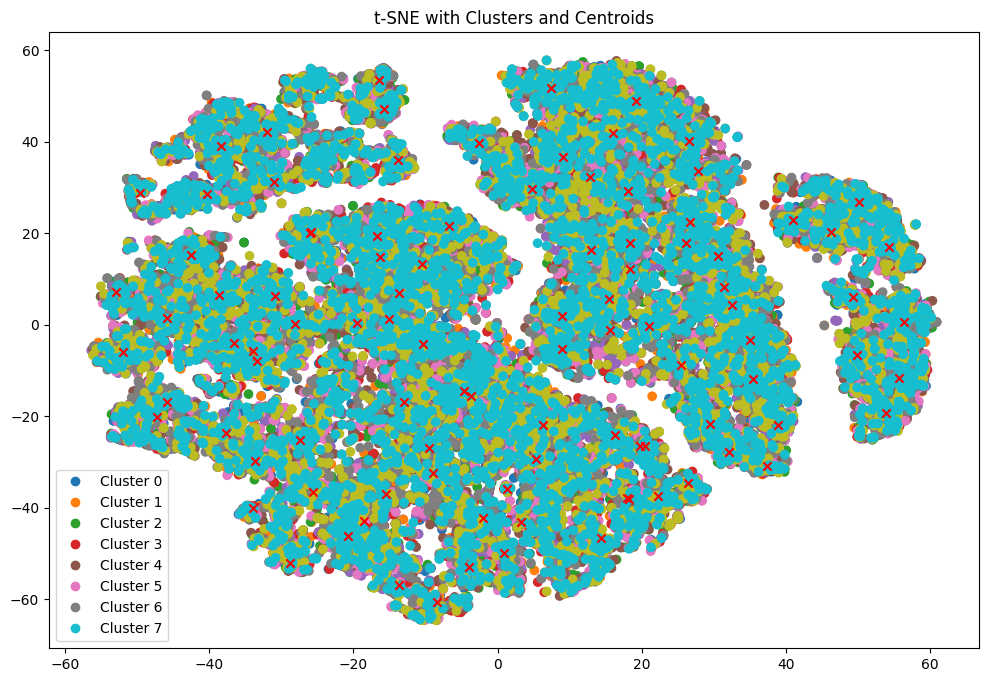

In [29]:
visualize_tsne_with_clusters(X_train, agglomerative_global_labels, centroids_agglomerative_global)
visualize_tsne_with_clusters(X_train, agglomerative_local_labels, centroids_agglomerative_local)

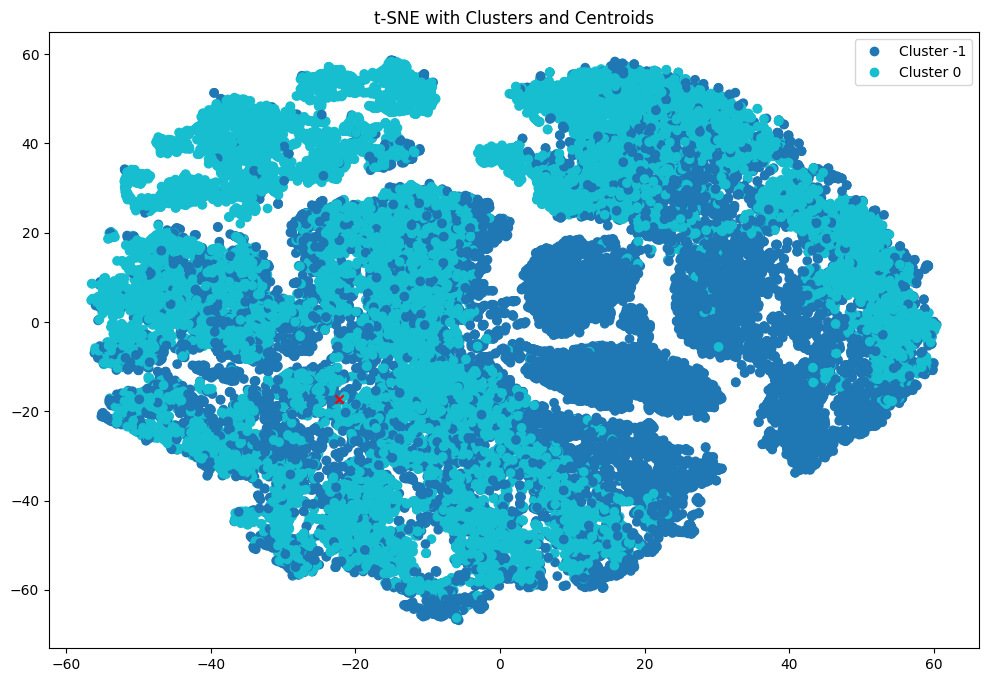

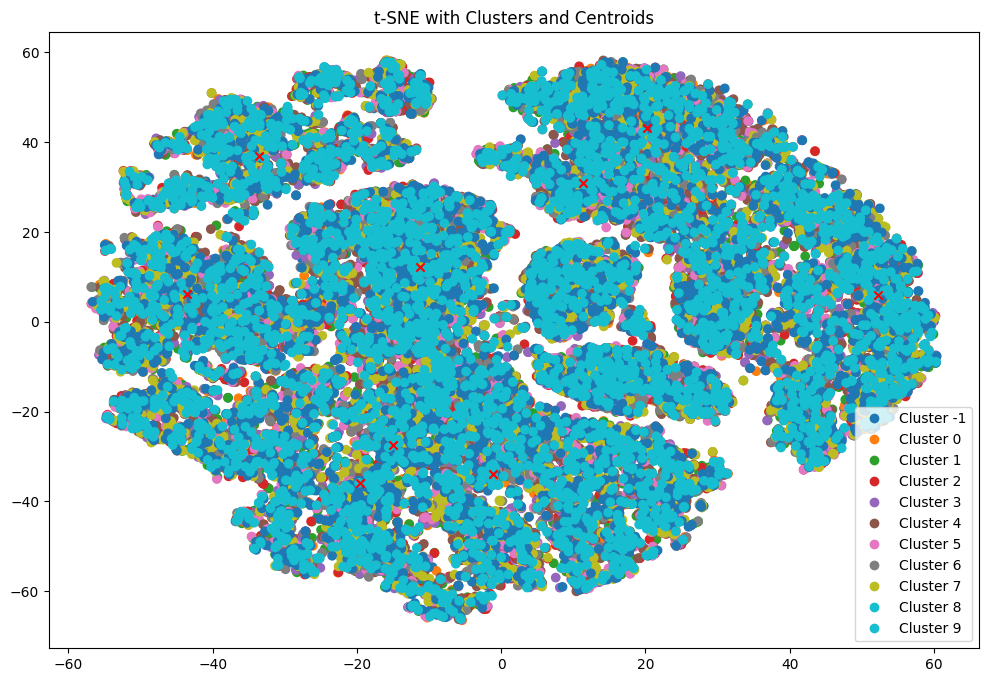

In [30]:
visualize_tsne_with_clusters(X_train, dbscan_global_labels, centroids_dbscan_global)
visualize_tsne_with_clusters(X_train, dbscan_local_labels, centroids_dbscan_local)